In [91]:
import random
import seaborn as sns
import  matplotlib.pyplot as plt

In [92]:
def deck(deck=1):
    num=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10,10,10,10]
    all_deck=num*4*deck
    random.shuffle(all_deck)
    return(all_deck)

In [93]:
def drawCard():
    player_count=0
    dealer_count=0
    
    player_count=player_count+x.pop()
    #print(f"Players first card:{player_count}")
    dealer_count=dealer_count+x.pop()
    #print(f"Dealers first card:{dealer_count}")
    player_count=player_count+x.pop()
    dealer_count=dealer_count+x.pop()

#     print(f"Player Total: {player_count}")
#     print(f"Dealer Total: {dealer_count}")
#     print(f"Card remaining : {len(x)}")
#     print()
    
    if player_count>dealer_count:
        #return(f"Player won: ,{player_count} vs. {dealer_count}",1)
        return(1)
    else:
        #return (f"Dealer won: {dealer_count} vs. {player_count}",0)
        return(0)
    
              

won: 8
won: 4
won: 5
won: 3
won: 6
won: 8
won: 5
won: 8
won: 6
won: 8
61


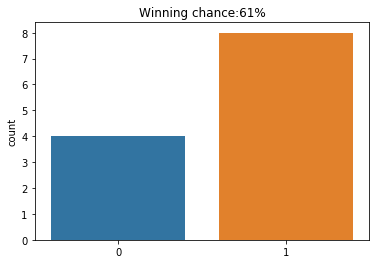

In [131]:
total=[]
for i in range(10) :
    rounds=len(deck())//4
    result=[]
    for i in range(rounds):
        try:
            a=drawCard()
            result.append(a)
        except IndexError:
            #print("Time to Resuffle")
            x=deck()
    #print(result)
    print(f'won: {sum(result)}')
    total.append(sum(result))
#    print(f'win%: {int(sum(result)/rounds*100)}')
#     print()
#total=sum(result)
print(sum(total))
sns.countplot(result)
plt.title(f'Winning chance:{int(sum(result)/rounds*100)}%')
plt.show()